# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [316]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './Day15'

### 之前做過的處理

In [317]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [318]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [319]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [320]:
# 挑出數值型資料
num_col = app_train.dtypes[app_train.dtypes.isin([np.dtype('int'), np.dtype('float')])].index

In [321]:
# 挑出不重複值大於20種以上的欄位
num = []
for i in num_col:
    if app_train[i].nunique() > 20: num.append(i)

In [322]:
df_num = app_train[num]
df_num.head()

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,202500.0,406597.5,24700.5,351000.0,0.018801,9461,-637.0,-3648.0,-2120,...,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,-1134.0,0.0,1.0
1,100003,270000.0,1293502.5,35698.5,1129500.0,0.003541,16765,-1188.0,-1186.0,-291,...,0.0787,0.0558,0.0039,0.01,0.0714,1.0,1.0,-828.0,0.0,0.0
2,100004,67500.0,135000.0,6750.0,135000.0,0.010032,19046,-225.0,-4260.0,-2531,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-815.0,0.0,0.0
3,100006,135000.0,312682.5,29686.5,297000.0,0.008019,19005,-3039.0,-9833.0,-2437,...,NaN,NaN,NaN,NaN,NaN,2.0,2.0,-617.0,NaN,NaN
4,100007,121500.0,513000.0,21865.5,513000.0,0.028663,19932,-3038.0,-4311.0,-3458,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-1106.0,0.0,0.0


In [323]:
df_num = df_num.dropna()

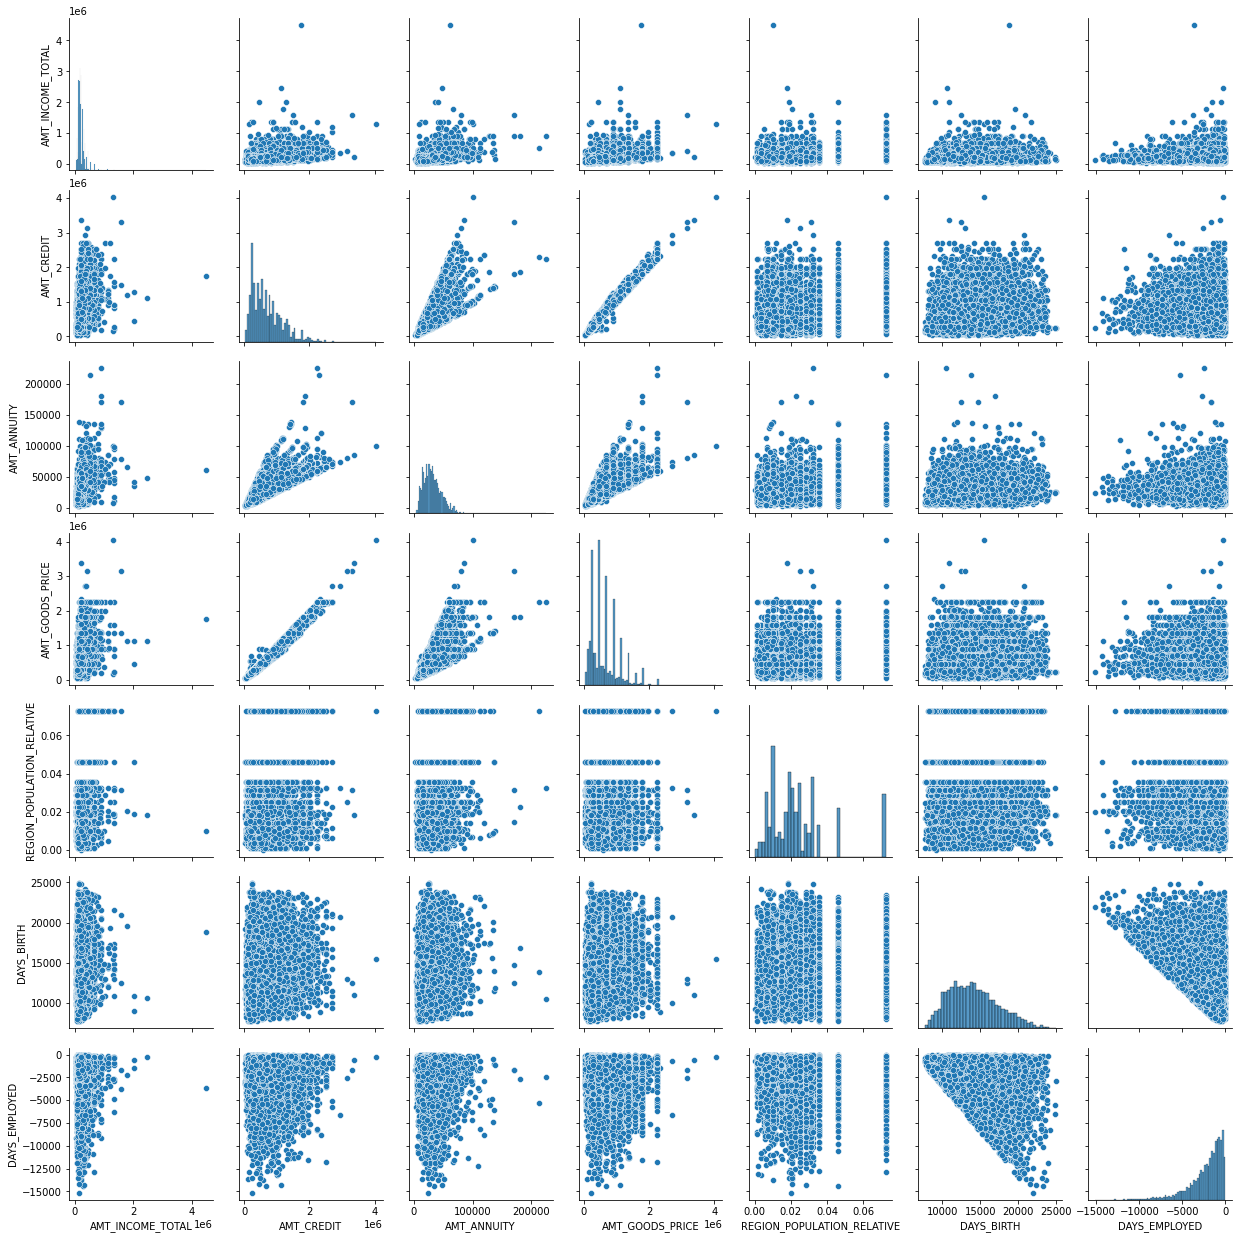

In [324]:
# 查看好奇的欄位的分佈
import seaborn as sns
sns.pairplot(df_num[['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED']])

In [325]:
# 我們就來看看 AMT_INCOME_TOTAL 跟 AMT_GOODS_PRICE 做離散化標籤，看看收入及商品價格詢問
income = df_num['AMT_INCOME_TOTAL']
price = df_num['AMT_GOODS_PRICE']

(29283.75, 480375.0]      10395
(480375.0, 927000.0]        316
(927000.0, 1373625.0]        28
(1373625.0, 1820250.0]        3
(1820250.0, 2266875.0]        2
(2266875.0, 2713500.0]        1
(2713500.0, 3160125.0]        0
(3160125.0, 3606750.0]        0
(3606750.0, 4053375.0]        0
(4053375.0, 4500000.0]        1
Name: AMT_INCOME_TOTAL, dtype: int64


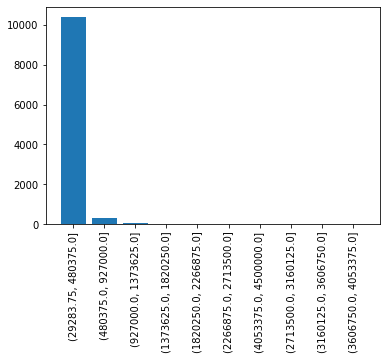

In [326]:
# 我們就來看看 AMT_INCOME_TOTAL 跟 AMT_GOODS_PRICE 做離散化標籤，看看收入及商品價格詢問
# 以下的資訊看起來分佈非常稱疵不齊，幾乎都集中在類別1，看能不能用分位數來劃分
income_cut = pd.cut(income,10)
print(income_cut.value_counts().sort_index())
plt.bar(x=income_cut.value_counts().index.values.astype('str'), height=income_cut.value_counts().values)
plt.xticks(rotation=90)
plt.show();

(0.0, 33750.0]              1
(33750.0, 112500.0]      1459
(112500.0, 135000.0]     1302
(135000.0, 157500.0]     1131
(157500.0, 180000.0]     1343
(180000.0, 195750.0]      138
(195750.0, 225000.0]     1983
(225000.0, 247500.0]      397
(247500.0, 283500.0]      845
(283500.0, 360000.0]     1231
(360000.0, 4500000.0]     916
Name: AMT_INCOME_TOTAL, dtype: int64


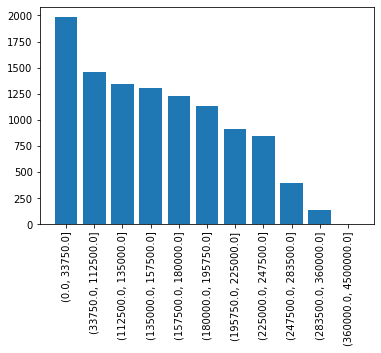

In [327]:
# 以下調整用分位數來劃分
qtile = income.quantile(np.arange(0,1.1,0.1)).values
income_cut = pd.cut(income,np.append(0,qtile))
print(income_cut.value_counts().sort_index())
plt.bar(x=income_cut.value_counts().sort_index().index.values.astype('str'), height=income_cut.sort_index().value_counts().values)
plt.xticks(rotation=90)
plt.show();

(0.0, 45000.0]              19
(45000.0, 202500.0]       1069
(202500.0, 247500.0]      1088
(247500.0, 342000.0]      1059
(342000.0, 450000.0]      1435
(450000.0, 495000.0]       736
(495000.0, 675000.0]      1451
(675000.0, 792000.0]       671
(792000.0, 909000.0]      1075
(909000.0, 1215000.0]     1073
(1215000.0, 4050000.0]    1070
Name: AMT_GOODS_PRICE, dtype: int64


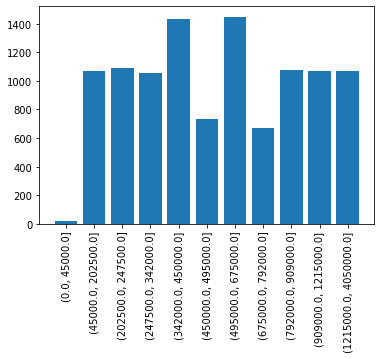

In [328]:
# 在GOODS_PRICES 也用一樣的方法
qtile = price.quantile(np.arange(0,1.1,0.1)).values
price_cut = pd.cut(price,np.append(0,qtile))
print(price_cut.value_counts().sort_index())
plt.bar(x=price_cut.value_counts().sort_index().index.values.astype('str'), height=price_cut.value_counts().sort_index().values)
plt.xticks(rotation=90)
plt.show();

In [329]:
qtile = app_train['AMT_INCOME_TOTAL'].quantile(np.arange(0,1.1,0.1)).values
app_train['INCOME_CUT'] = pd.cut(app_train['AMT_INCOME_TOTAL'],np.append(0,qtile), labels=np.arange(1,12))

In [330]:
qtile = app_train['AMT_GOODS_PRICE'].quantile(np.arange(0,1.1,0.1)).values
app_train['PRICE_CUT'] = pd.cut(app_train['AMT_GOODS_PRICE'],np.append(0,qtile), labels=np.arange(1,12))

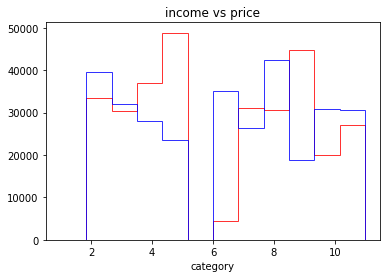

In [347]:
plt.hist(app_train['INCOME_CUT'], color='r',alpha=0.8,histtype='step',bins=12)
plt.hist(app_train['PRICE_CUT'], color='b',alpha=0.8, histtype='step',bins=12)
plt.title('income vs price')
plt.xlabel('category')
plt.show();